# Сборный проект №1

Заказчик: интернет-магазин, продающий компьютерные игры по всему миру.

Из открытых источников доступны исторические данные:
* о продажах игр,
* оценки пользователей и экспертов,
* жанры и игровые платформы.

Данные представлены до 2016 года, за 2016 год могут быть неполными.

Необходимо выявить закономерности, определяющие успешность игры. Это позволит заказчику сделать ставку на потенциально популярный продукт и корректно спланировать рекламные кампании.

## Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Загрузка файла с данными и изучение общей информации

In [1]:
# загружаем необходимые библиотеки и определяем пространства имён
import pandas as pd
import math
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import scipy.stats as st
from functools import reduce
idx = pd.IndexSlice

#включим отображение всех столбцов таблиц и округлим числа до сотых
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# загружаем файл с данными
try:
    df = pd.read_csv('datasets/data_08/games.csv') # locally hosted datafile ## , sep='\t'
except:
    df = pd.read_csv('/datasets/games.csv') # Yandex-hosted datafile  ## , sep='\t'

# общий анализ структуры и состава загруженного файла
df.info()
print("\nЧисло пропусков в данных:\n", df.isna().sum())
display(df.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Число пропусков в данных:
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       85

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2383,Sleeping Dogs,X360,"2,012.00",Action,0.38,0.40,0.01,0.08,80.00,7.9,M
7425,UFC Undisputed 2010,PSP,"2,010.00",Fighting,0.11,0.06,0.00,0.04,74.00,7,T
460,LEGO Batman: The Videogame,DS,"2,008.00",Action,1.75,1.01,0.00,0.29,72.00,8,E10+
6278,Dead Rising 2: Off the Record,X360,"2,011.00",Action,0.17,0.08,0.00,0.02,72.00,7.5,M
4102,Crash of the Titans,DS,"2,007.00",Action,0.42,0.02,0.00,0.04,73.00,5.9,E
3341,Call of Juarez: Bound in Blood,X360,"2,009.00",Shooter,0.30,0.24,0.00,0.06,77.00,7.6,M
8257,NHL 2K9,X360,"2,008.00",Sports,0.15,0.01,0.00,0.01,69.00,6.7,E10+
13783,Hanaoni: Yume no Tsudzuki,PSP,"2,012.00",Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN
16238,Fernbus Simulator,PC,"2,016.00",Simulation,0.00,0.01,0.00,0.00,NaN,tbd,NaN
1250,Monopoly,PS,"1,997.00",Misc,1.18,0.27,0.00,0.05,NaN,NaN,NaN


In [3]:
# сразу посмотрим некоторые странности
display(df.query('Year_of_Release.isna()').sample(10))

display(df.Platform.unique())

display(df.Genre.unique())

display(df.Critic_Score.unique())

display(df.User_Score.unique())
display(df.query("User_Score == 'tbd'"))

display(df.Rating.unique())
display(df.Rating.value_counts())
display(df.query("Rating == 'RP'"))
display(df.query("Rating == 'AO'"))
#Everyone (E) 1994–1998 (as K-A) 1998–present (as E)
#EC (Early Childhood) 3+ --> E

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4959,Silent Hill: Homecoming,PS3,NaN,Action,0.18,0.14,0.00,0.06,71.00,6.9,M
6818,BioShock 2,PC,NaN,Shooter,0.02,0.19,0.00,0.04,88.00,8,M
15675,Cabela's Alaskan Adventure,PS2,NaN,Sports,0.01,0.01,0.00,0.00,NaN,NaN,NaN
6773,Mega Man X Collection,PS2,NaN,Misc,0.12,0.09,0.00,0.03,73.00,8.8,E
5889,NBA Live 2003,GC,NaN,Sports,0.23,0.06,0.00,0.01,82.00,8.2,E
11550,Get Fit with Mel B,X360,NaN,Sports,0.00,0.06,0.00,0.01,57.00,NaN,E
11455,The Hidden,3DS,NaN,Adventure,0.08,0.00,0.00,0.01,NaN,4.2,E10+
3024,"The Chronicles of Narnia: The Lion, The Witch ...",GBA,NaN,Action,0.48,0.18,0.00,0.01,66.00,6.8,E
12568,Prinny: Can I Really Be The Hero? (US sales),PSP,NaN,Action,0.06,0.00,0.00,0.00,NaN,NaN,NaN
9827,WRC: FIA World Rally Championship,X360,NaN,Racing,0.00,0.10,0.00,0.02,66.00,6,E10+


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,"2,010.00",Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,"2,005.00",Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,"2,011.00",Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,"2,010.00",Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,"2,001.00",Action,0.01,0.00,0.00,0.00,67.00,tbd,E
16697,Bust-A-Move 3000,GC,"2,003.00",Puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16698,Mega Brain Boost,DS,"2,008.00",Puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16704,Plushees,DS,"2,008.00",Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13672,Clockwork Empires,PC,NaN,Strategy,0.00,0.04,0.00,0.00,58.00,3.8,RP
14270,Supreme Ruler: Cold War,PC,"2,011.00",Strategy,0.00,0.03,0.00,0.01,63.00,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.00,65.00,NaN,RP


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
875,Grand Theft Auto: San Andreas,XB,"2,005.00",Action,1.26,0.61,0.00,0.09,93.00,8.6,AO


## Выводы по шагу 1

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* В классификаторах дубли не выявлены
* В данных есть пропуски: в колонках Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Необходимо будет удалить строки или обработать пропуски.
* Колонки названы в смешанном регистре, их необходимо будет переименовать.
* Необходимо преобразовать тип данных колонок года выпуска, оценки критиков и пользователей
* Колонка User_Score содержит 2424 значений 'tbd' - to be determined. Необходимо учитывать это при расчётах.
* необходима дедупликация неявных значений колонки 'rating' и замена в ней пустых значений на специальное непустое

## Шаг 2. Подготовка данных
План действий:
* Оптимизировать названия столбцов.
* Преобразовать данные в нужные типы и объяснить принцип замены.
* Обработать пропуски.
* Посчитать суммарные продажи во всех регионах в отдельном столбце.

In [4]:
#приведем названия стобцов к нижнем регистру
###df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 
###                'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
###df.head(2)

df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Игр с пустым названием и жанром всего две. Название и жанр являются ключевыми в анализе, восстановить пропущенные значения невозможно. В масштабах выборки это несущественный объём, поэтому - удалим их.

In [5]:
# игры с пустым названием и жанром
display(df.query('name.isna()'))
df.dropna(subset=['name'], inplace=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Столбцы year_of_release и critic_score необходимо преобразовать в Int, т.к. в них содержатся целочисленные данные.

Отсутсвующий год игры можно попробовать восстановить из аналогичной игры для другой платформы. В этом случае большого разброса по годам быть не должно, для задач анализа это подходит.

Остальные имеющиеся пропуски можно было бы восстановить из соответсвующих игровых онлайн-каталогов (вручную или через парсинг). 
Но, т.к. такие задачи в текущем проекте не ставятся, примем восстановление как невозможное в разумный срок с разумными трудозатратами.

Заполнение пропусков с помощью средних/медианных значений в целом или по жанрам, или иных синтетических значений, выглядит методически неподходящей: по иеющейся аналитике  невозможно предсказать рейтинг игр, он может быть любым.
Так как пустые значений np.NaN и pd.NA успешно игнорируются большинством инструментов pandas, оствим пропуски "как есть".

Отдельно стоит сказать про значение 'tbd' в user_score. Так как это тоже отсутсвующий рейтинг, его необходимо будет преобразовать в NaN, после чего преобразовать тип колонки в вещественное число.

In [6]:
# преобразование типов данных колонок
##df_games.year_of_release = df_games.year_of_release.astype(np.int64)
df.year_of_release = df.year_of_release.astype('Int64')
df.critic_score = df.critic_score.astype('Int64')


# сделаем установку года игр с совпадающим названием
for i in df[df['year_of_release'].isnull() == True].index:  
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()
    
#Посмотрим сколько удалось заполнить пустых значений
print("Осталось игр без указания года: ", df['year_of_release'].isna().sum(), "\n")

## удалим оставшиеся игры без указания года - это менее 1% от объёма выборки
df.dropna(subset=['year_of_release'], inplace=True)

# приведём все неизвестные значения рейтинга к NaN
df.loc[df['user_score'] == "tbd",'user_score'] = np.NaN
df.user_score = df.user_score.astype('float64')

### обработаем рейтинг:
# в рамках проекта нет смысла хранить целую одну запись с рейтингом AO. Объедимим с наиболее близким по сути -- Mature.
df.loc[df['rating'] == "AO",'rating'] = "M"
df.loc[df['rating'] == "EC",'rating'] = "E"
df.loc[df['rating'] == "K-A",'rating'] = "E"
df.loc[df['rating'] == "RP",'rating'] = np.NaN

### Заменим пропуски в рейтинге на специальное "магическое" строковое значение
df.loc[df['rating'].isna(),'rating'] = "unk"

display(df.rating.value_counts())

# считаем суммарные продажи во всех регионах и запишите их в отдельный столбец.
###df['sales_total'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales
df['sales_total'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# пользовательский коэффициент оценки - 10-балльный. Для отображения на одной оси с оценками критиков умножим его на 10
df.loc[:,'user_score_10x'] = (df['user_score'] * 10)

# объективный контроль изменений
display(df.user_score.unique())
display(df.sample(10))
display(df.describe())
df.info()

Осталось игр без указания года:  146 



unk     6701
E       3969
T       2930
M       1555
E10+    1412
Name: rating, dtype: int64

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total,user_score_10x
5630,Persona 4: Dancing All Night,PSV,2015,Misc,0.09,0.04,0.15,0.04,76,8.60,T,0.32,86.00
8532,Dr. Muto,PS2,2002,Platform,0.08,0.06,0.00,0.02,<NA>,NaN,unk,0.16,NaN
1006,Pro Evolution Soccer,PS2,2001,Sports,0.06,0.90,0.53,0.27,<NA>,NaN,unk,1.76,NaN
599,Ratchet & Clank Future: Tools of Destruction,PS3,2007,Platform,0.93,1.10,0.08,0.45,<NA>,NaN,unk,2.56,NaN
8111,Sing4: The Hits Edition,Wii,2011,Misc,0.17,0.00,0.00,0.01,<NA>,NaN,T,0.18,NaN
12981,Domino Rally,Wii,2007,Action,0.05,0.00,0.00,0.00,57,NaN,E,0.05,NaN
15668,Entaku no Seito: The Eternal Legend,PSP,2012,Role-Playing,0.00,0.00,0.02,0.00,<NA>,NaN,unk,0.02,NaN
11196,Henry Hatsworth in the Puzzling Adventure,DS,2009,Puzzle,0.08,0.00,0.00,0.01,82,8.00,E,0.09,80.00
1425,Dragon Quest III: Soshite Densetsu e...,SNES,1996,Role-Playing,0.00,0.00,1.36,0.00,<NA>,NaN,unk,1.36,NaN
16669,Super Robot Taisen: Original Generation,GBA,2002,Role-Playing,0.01,0.00,0.00,0.00,72,NaN,T,0.01,NaN


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_total,user_score_10x
count,"16,567.00","16,567.00","16,567.00","16,567.00","16,567.00","8,075.00","7,540.00","16,567.00","7,540.00"
mean,"2,006.49",0.26,0.15,0.08,0.05,68.99,7.13,0.54,71.25
std,5.86,0.82,0.51,0.31,0.19,13.92,1.50,1.55,14.98
min,"1,980.00",0.00,0.00,0.00,0.00,13.00,0.00,0.00,0.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00,6.40,0.06,64.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00,7.50,0.17,75.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00,8.20,0.47,82.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00,9.70,82.54,97.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   Int64  
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
 11  sales_total      16567 non-null  float64
 12  user_score_10x   7540 non-null   float64
dtypes: Int64(2), float64(7), object(4)
memory usage: 1.8+ MB


In [7]:
#прверим данные на наличие полных дубликатов
df.duplicated().sum()

0

## Выводы по шагу 2

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Все колонки переименованы в нижний регистр.
* Удалены две строки с пустым названием и жанром.
* Пропуски года релиза частично восстановлены по аналогичным играм для друих платформ. Остальные восстановить невозможно, поэтому они оставлены как незаполненные. Большинство инструментов pandas будут их игнорировать.
* Колонки year_of_release, critic_score преобразованы в Int64 с сохранением пропусков.
* В колонке user_score значение 'tbd' приведено к общему значению пропусков - np.NaN.
* Добавлена колонка sales_total с суммарными продажами по всем регионам
* проведена дедупликация неявных значений колонки 'rating', пустые значения заменены на 'unk'

## Шаг 3. Исследовательский анализ данных
План:
* Определить максимальную глубину анализа данных.
* Оценить изменение продаж по платформам.
* Выбрать платформы с наибольшими суммарными продажами и оценить их жизненный цикл.
* Определить актуальный период данных для прогноза на 2017 год.
* Выбрать несколько потенциально прибыльных платформ.
* Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
* Оценить влияние на продажи отзывов пользователей и критиков внутри одной популярной платформы.
* Оценить общее распределение игр по жанрам. Дать характеристику самым прибыльных жанрам.

Text(0.5, 1.0, 'График выпущенных игр по годам')

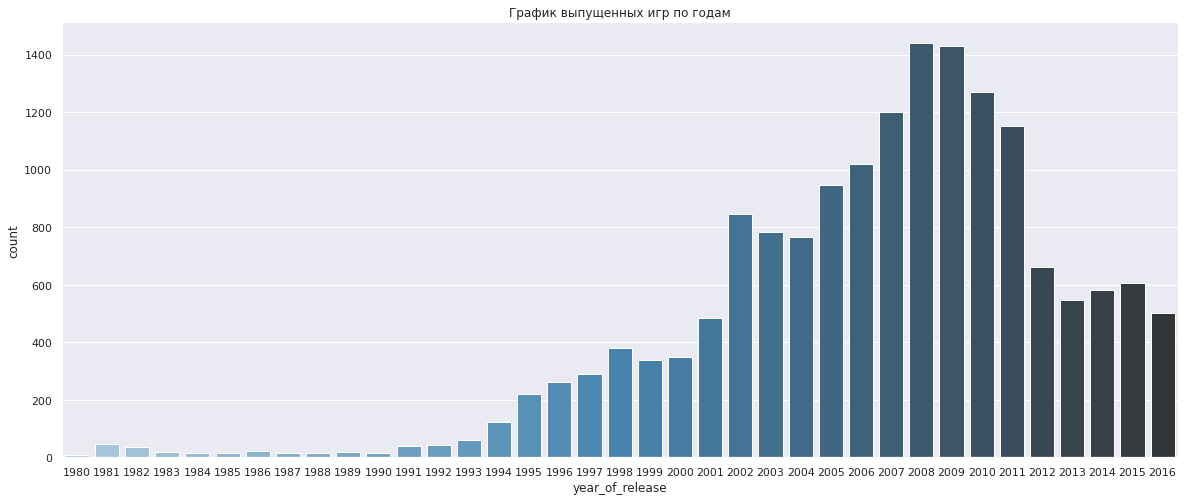

In [8]:
#создадим сводную таблицу
year_of_release = df.pivot_table(index='year_of_release', values='sales_total', aggfunc='count')
year_of_release.columns = ['count']

#потроим график
f, ax = plt.subplots(figsize=(20, 8))
ax = sns.barplot(x=year_of_release.index, y="count", data=year_of_release, palette="Blues_d")
plt.title('График выпущенных игр по годам')

* Данными до 1994 года можно пренебречь.
* С 2001 года наблюдается бурный рост, связанный с резким ростом технологических возможностей и распространённости компьютеров и игровых систем.
* Пик приходится на 2007-2011 годы. Далее можно говорить о появлении такого мощного игрока, как мобильные игры, тенденции к переходу рынка на игры-сервисы и общему кризису в стане производителей AAA-игр.

Text(0, 0.5, 'Объём продаж (млн. копий)')

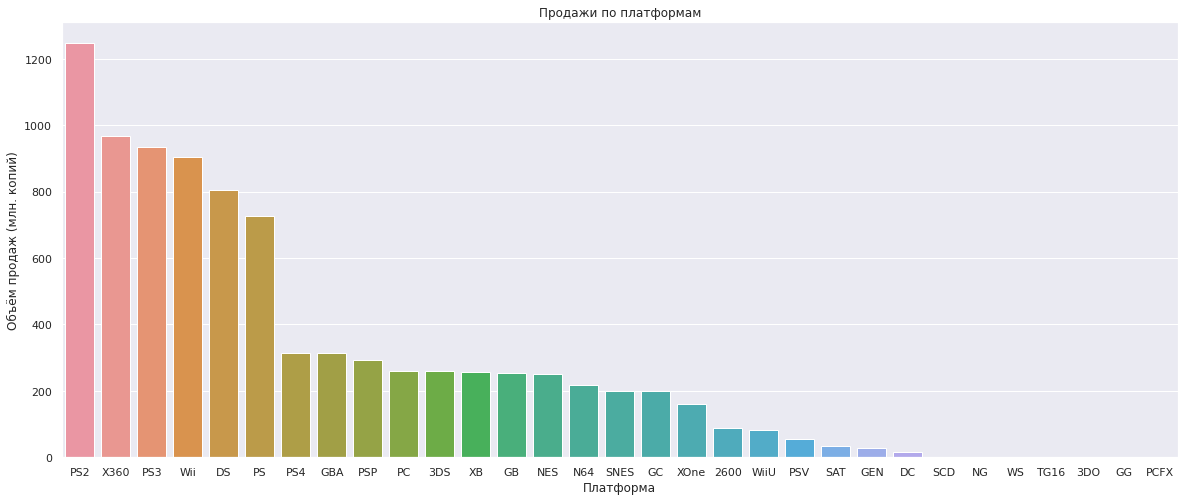

In [9]:
# Посмотрите, как менялись продажи по платформам.
# Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.
# За какой характерный срок появляются новые и исчезают старые платформы?

total_platform_sales = df.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=False)

plt.figure(figsize=(20,8))
sns.barplot(x=total_platform_sales.index,y=total_platform_sales['sales_total'])
plt.title("Продажи по платформам")
plt.xlabel("Платформа")
plt.ylabel("Объём продаж (млн. копий)")

С большим отрывом по объёму проданных копий лидируют шесть игровых платформ: PS2, X360, PS3, WII, DS, PS.

Но это по данным за весь период, для построения длинных графиков.

Позже будет отдельный отбор по актуальным для анализа данным.

In [10]:
# функция возвращает сводную таблицу и выводит данные с 2005 года
def platform_yts(platform_name, data):
    return data[(data['platform'] == platform_name) & (data['year_of_release'] > 1994)].pivot_table(
        index='year_of_release', values='sales_total', aggfunc='sum').sort_values('year_of_release', ascending=False)

# таблица по топ-платформам и их сводным продажам
top_platforms = df.pivot_table(
    index='platform', values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=False).head(10)
top_platforms = top_platforms.reset_index().rename_axis(None, axis=1)

display(top_platforms)

,platform,sales_total
0,PS2,"1,247.16"
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.28
5,PS,727.58
6,PS4,314.14
7,GBA,313.73
8,PSP,293.57
9,PC,258.86


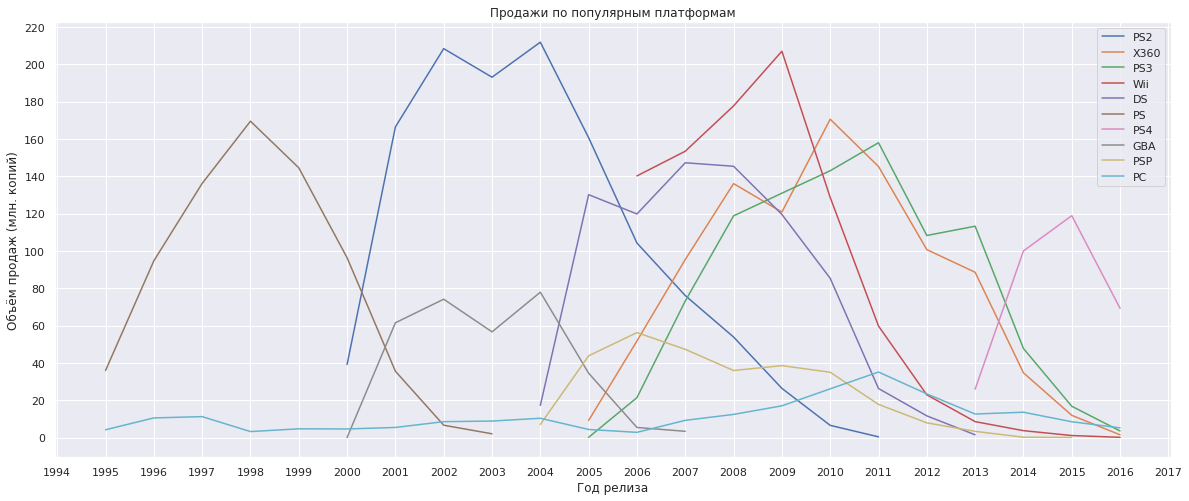

In [11]:
#выведем топ-платформы и динамику их разивия за последние десять лет
plt.figure(figsize=(20,8))
plt.title('Продажи по популярным платформам')
plt.xlabel('Год релиза')
plt.ylabel('Объём продаж (млн. копий)')

for i in list(top_platforms['platform']):
    loc_x = plticker.MultipleLocator(base=1.0)
    loc_y = plticker.MultipleLocator(base=20.0)
    axes = sns.lineplot(data=platform_yts(i,df)['sales_total'], label=i, estimator=None)
    axes.xaxis.set_major_locator(loc_x)
    axes.yaxis.set_major_locator(loc_y)
    plt.legend()

На первый взгляд график может показаться плохо читаемым. Исходно были выбраны первые пять платформ, но они все уже завершили свой жизненный цикл. 

Данный график позволяет взглянуть на значимых игроков практически за весь период существования игр.

Первичный вывод неутешителен: практически все весомые платформы закончили свой жизненный цикл, а PS4 уже находится на спаде. Персональные компьютеры традиционно находятся в диапазоне до 20 млн. проданных копий.

В целом, выход платформы на пиковые показатели занимает 3-5 лет, далее идёт спад 3-7 лет. А общий жизненный цикл составляет от семи до одиннадцати лет.

Глядя на график PS4 можно сделать предположение, что жизненный цикл современных платформ может ускоряться на фоне снижения общего количества сильных конкурентов. Хотя, именно PS4 может быть и просто неудачным проектом.

Что касается периода актуальных данных - выберем его равным максимальному циклу жизни консоли, т.е. 11 годам. Будем отбирать данные с 2005 года.

In [12]:
# период актуальных данных - выберем его равным максимальному циклу жизни консоли, т.е. 11 годам. Будем отбирать данные с 2005 года.
df_actual = df[df['year_of_release'] >= 2013]

# для дальнейшего анализа выберем первые пять платформ: 
# * ПК не является полноценной игровой платформой,
# * GBA и PSP являются портативными системами,
# * а по PS4 представлены неполные данные.
top_platforms = df_actual.pivot_table(
    index='platform', values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=False).head(5)
top_platforms = top_platforms.reset_index().rename_axis(None, axis=1)
display(top_platforms)


top_platform_list = ['PS4','PS3','XOne','3DS','X360']
df_top_platforms = df_actual[df_actual['platform'].isin(top_platform_list)]
df_top_platforms = df_top_platforms[df_top_platforms['sales_total']<1.4]
df_top_platforms['sales_total'].describe()

,platform,sales_total
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80


count   1,302.00
mean        0.26
std         0.31
min         0.01
25%         0.04
50%         0.12
75%         0.36
max         1.39
Name: sales_total, dtype: float64

Text(0, 0.5, 'Объём продаж (млн. копий)')

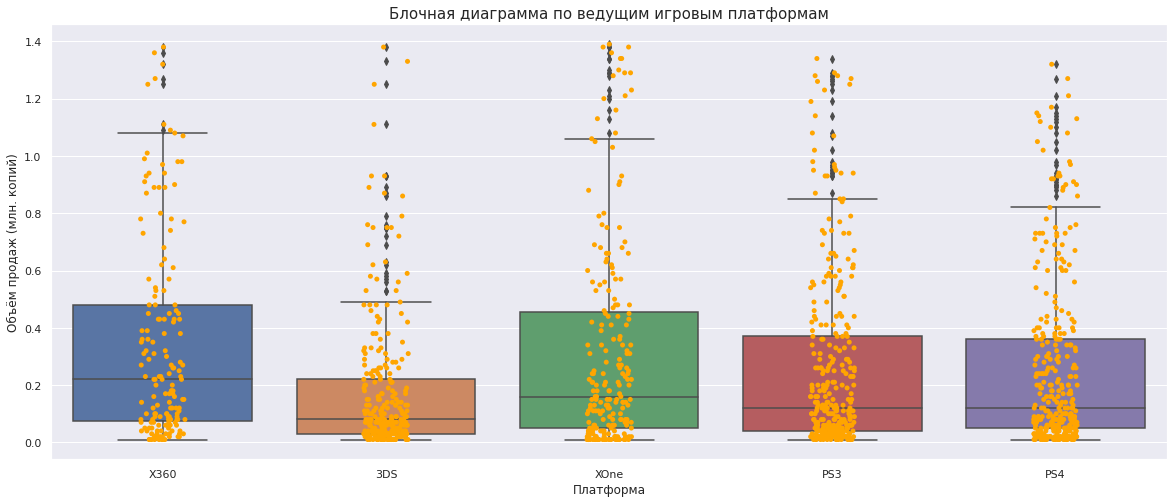

In [13]:
#выведем boxplot по платформам
plt.figure(figsize=(20,8))
sns.boxplot(data=df_top_platforms, x='platform', y='sales_total')
sns.stripplot(data=df_top_platforms, x='platform', y='sales_total', color = 'orange')
plt.title('Блочная диаграмма по ведущим игровым платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Объём продаж (млн. копий)',fontsize=12)

Медианные объёмы продаж по убыванию: X360, XOne, PS4, PS3 и 3DS.

Далее проанализируем влияние отзывов пользователей и критиков на продажи популярной платформы.

In [14]:
#функция оценки корреляции отзывов по выбранным для анализа платформам
def platform_review_correlations(platform_name):
    
    print('\nАнализ платформы ', platform_name, '\n')
    
    # корреляции
    df_current_platform = df_actual.loc[df['platform'] == platform_name]

    corr_user = df_current_platform['user_score'].corr(df_current_platform['sales_total'], method='spearman')
    corr_critic = df_current_platform['critic_score'].corr(df_current_platform['sales_total'], method='spearman')
    
               
    corr_user_strength = ''
        
    if corr_user >= 0:
        corr_user_sign = ''
    else:
        corr_user_sign = ' отрицательная'
    
    if 0.3 >= abs(corr_user) >= 0.1:
        corr_user_strength = '[cлабая'+corr_user_sign+']'
    if 0.5 >= abs(corr_user) >= 0.3:
        corr_user_strength = '[умеренная'+corr_user_sign+']'
    if 0.7 >= abs(corr_user) >= 0.5:
        corr_user_strength = '[высокая'+corr_user_sign+']'
    if 0.9 >= abs(corr_user) >= 0.7:
        corr_user_strength = '[очень высокая'+corr_user_sign+']'
    if 1 >= abs(corr_user) >= 0.9:
        corr_user_strength = '[сильная'+corr_user_sign+']'
    
    corr_critic_strength = ''
    
    if corr_critic >= 0:
        corr_critic_sign = ''
    else:
        corr_critic_sign = ' отрицательная'
    
    if 0.3 >= abs(corr_critic) >= 0.1:
        corr_critic_strength = '[cлабая'+corr_critic_sign+']'
    if 0.5 >= abs(corr_critic) >= 0.3:
        corr_critic_strength = '[умеренная'+corr_critic_sign+']'
    if 0.7 >= abs(corr_critic) >= 0.5:
        corr_critic_strength = '[высокая'+corr_critic_sign+']'
    if 0.9 >= abs(corr_critic) >= 0.7:
        corr_critic_strength = '[очень высокая'+corr_critic_sign+']'
    if 1 >= abs(corr_critic) >= 0.9:
        corr_critic_strength = '[сильная'+corr_critic_sign+']'
    
    print("Корреляция между оценками пользователей и продажами:", corr_user_strength, corr_user)
    print("Корреляция между оценками критиков и продажами:", corr_critic_strength, corr_critic)
    print('\n')
    
    display(df_current_platform[['user_score','critic_score']].describe())
    
    #Построим диаграмму рассеяния
    ax1 = df_current_platform.plot(y='sales_total',x='user_score_10x',kind='scatter', figsize=(20,8), c='C1', label='Оценки пользователей')
    df_current_platform.plot(y='sales_total',x='critic_score',kind='scatter', figsize=(20,8), c='C0', ax=ax1, label='Оценки критиков')
    plt.title('Корреляция оценок пользователей и критиков с общим объёмом продаж игр на платформе ' + platform_name, fontsize=15)
    
    plt.show()
    sns.set()
    
    print('\n')


Анализ платформы  PS4 

Корреляция между оценками пользователей и продажами:  -0.028340257414850134
Корреляция между оценками критиков и продажами: [высокая] 0.508238095708577




,user_score,critic_score
count,257.00,252.00
mean,6.75,72.09
std,1.46,12.49
min,1.50,19.00
25%,6.10,66.00
50%,7.00,73.00
75%,7.80,80.00
max,9.20,97.00


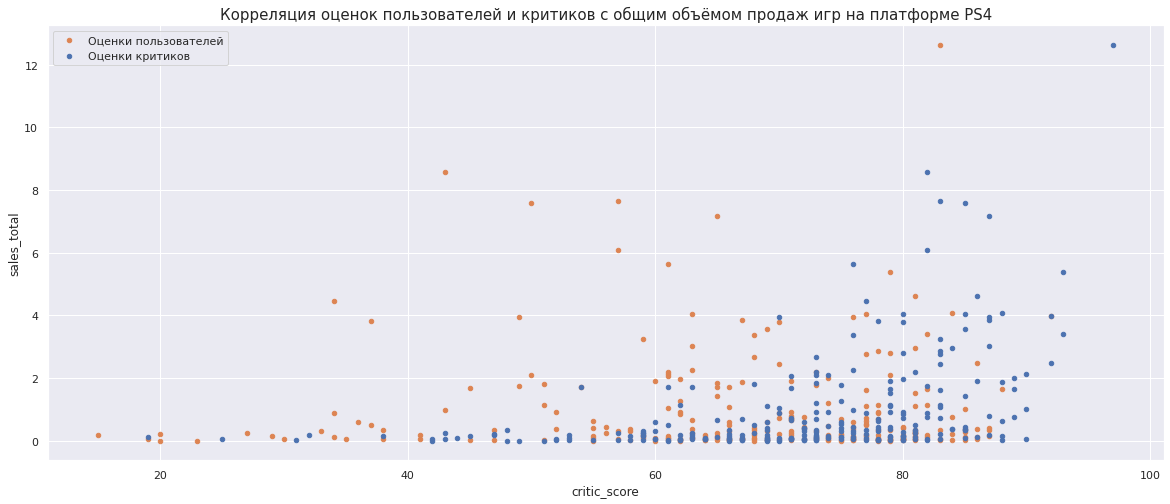




Анализ платформы  PS3 

Корреляция между оценками пользователей и продажами:  0.030801172290379656
Корреляция между оценками критиков и продажами: [высокая] 0.5899941148852291




,user_score,critic_score
count,186.00,121.00
mean,6.35,70.20
std,1.80,14.33
min,0.20,13.00
25%,5.12,63.00
50%,6.90,73.00
75%,7.80,80.00
max,9.10,97.00


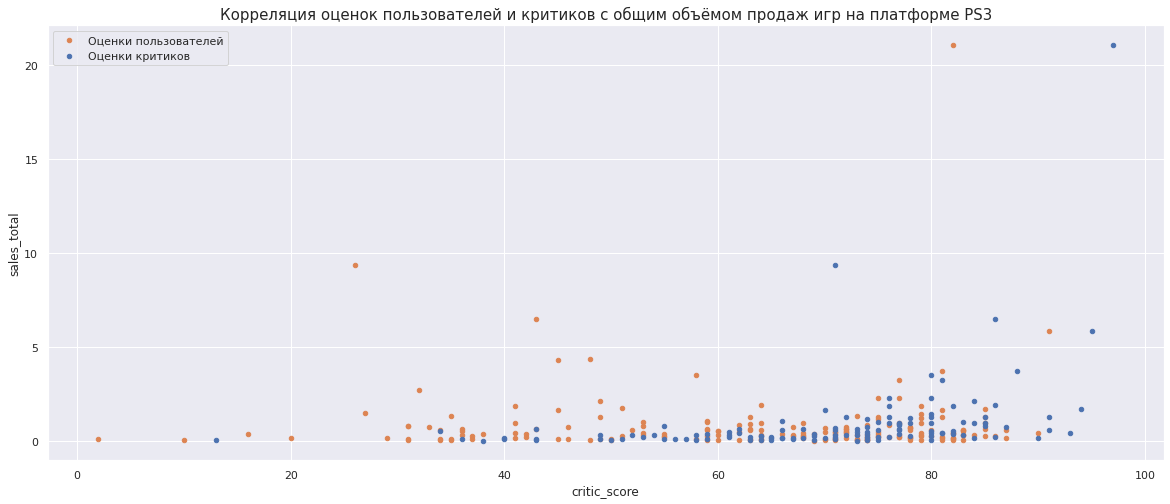




Анализ платформы  XOne 

Корреляция между оценками пользователей и продажами: [cлабая отрицательная] -0.10004846026194926
Корреляция между оценками критиков и продажами: [высокая] 0.5315784768367893




,user_score,critic_score
count,182.00,169.00
mean,6.52,73.33
std,1.38,12.95
min,1.60,20.00
25%,5.80,66.00
50%,6.80,76.00
75%,7.50,82.00
max,9.20,97.00


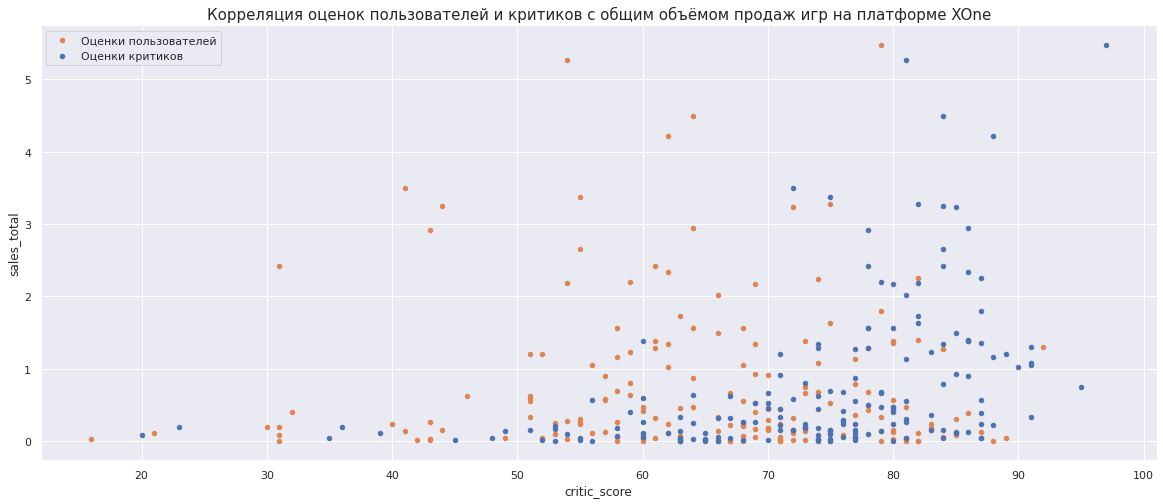




Анализ платформы  3DS 

Корреляция между оценками пользователей и продажами: [cлабая] 0.14271299090786274
Корреляция между оценками критиков и продажами: [умеренная] 0.3649373878956536




,user_score,critic_score
count,80.00,71.00
mean,6.98,68.34
std,1.54,13.09
min,2.40,26.00
25%,6.30,61.00
50%,7.30,69.00
75%,8.20,78.50
max,9.00,91.00


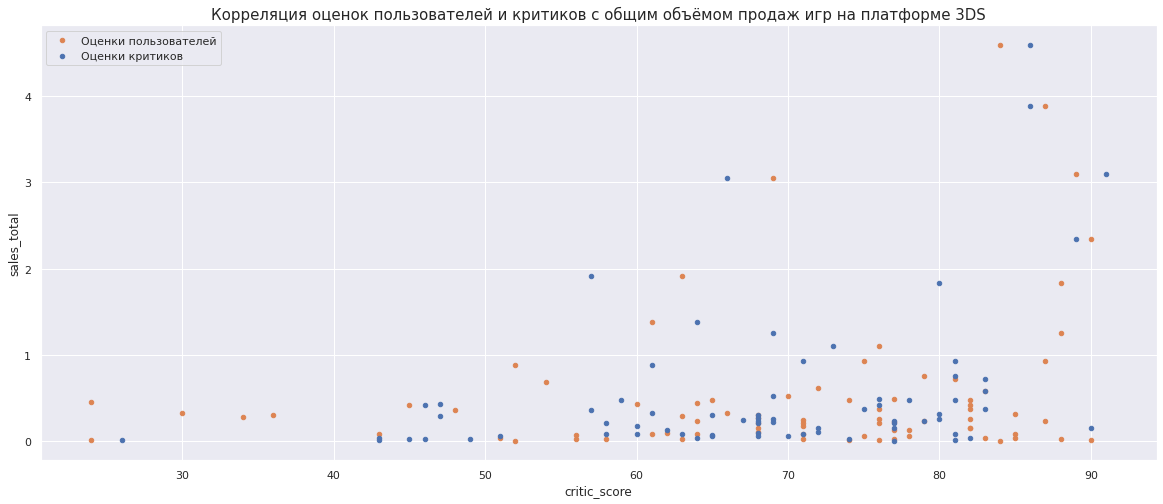




Анализ платформы  X360 

Корреляция между оценками пользователей и продажами:  0.034303758976979494
Корреляция между оценками критиков и продажами: [высокая] 0.6258142624817032




,user_score,critic_score
count,143.00,81.00
mean,5.99,69.23
std,1.61,15.51
min,0.70,19.00
25%,5.10,60.00
50%,6.20,74.00
75%,7.25,80.00
max,8.70,97.00


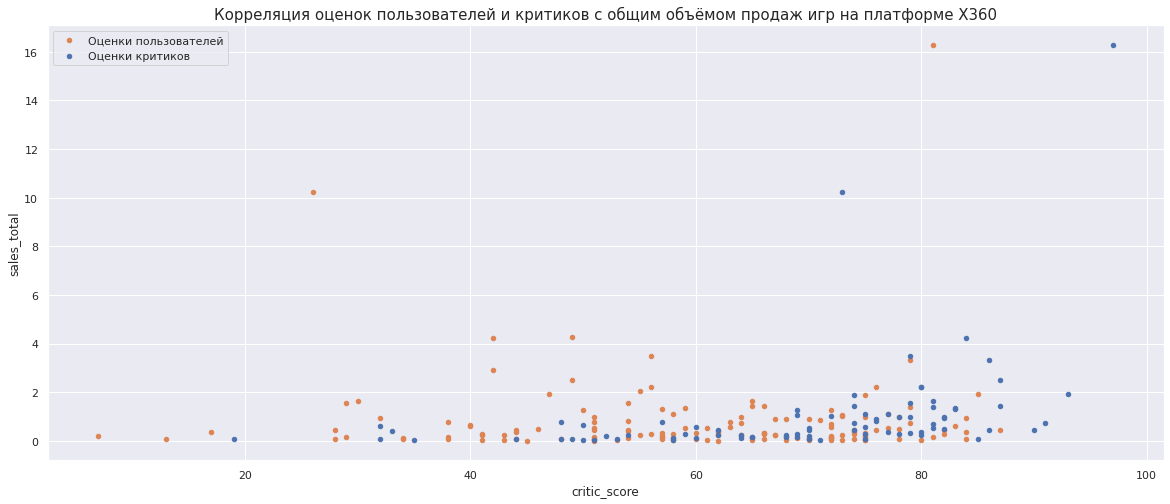

In [15]:
# выведем все платформы
for platform in top_platform_list:
    platform_review_correlations(platform)

* У всех выбранных платформ присутствует корреляция между объёмом продаж и оценками пользователей и критиков.
* При этом оценка критиков коррелирует с объёмами продаж на уровнях от умеренного до высокого. Оценки покупателей с объёмом продаж взаимосвязаны намного слабее.

In [ ]:
#определим наиболее продаваемые жанры
df_genres = df_actual.pivot_table(index='genre', values=['sales_total', 'name'], aggfunc={'sales_total':'sum','name': 'count'}).sort_values(by='sales_total', ascending=False)
df_genres = df_genres.reset_index().rename_axis(None, axis=1)
df_genres.loc[:,]['genre_ratio'] = df_genres['sales_total'] / df_genres['name'] 

df_genres_by_ratio = df_genres.sort_values(by='genre_ratio', ascending=False)

plt.figure(figsize=(20,8))
plt.title('Распределение игр по наиболее продаваемым жанрам',fontsize=15)
sns.barplot(data=df_genres, x='genre', y='sales_total')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Объём продаж (млн. копий)',fontsize=12)

plt.figure(figsize=(20,8))
plt.title('Распределение игр по наиболее продаваемым жанрам (средние продажи)',fontsize=15)
sns.barplot(data=df_genres_by_ratio, x='genre', y='genre_ratio')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Средние продажи (млн. копий) по жанру',fontsize=12)



In [ ]:
display(df_genres)
display(df_genres_by_ratio)

## Выводы по шагу 3

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

Общий анализ игр по годам:
* С 2001 года наблюдается бурный рост, связанный с резким ростом технологических возможностей и распространённости компьютеров и игровых систем.
* Пик приходится на 2007-2011 годы. Далее можно говорить о появлении такого мощного игрока, как мобильные игры, тенденции к переходу рынка на игры-сервисы и общему кризису в стане производителей AAA-игр.

Цикл жизни платформ:
* Выделено шесть значимых игроков (PS2, X360, PS3, WII, DS, PS), при этом практически все они закончили свой жизненный цикл. А новая платформа PS4, ещё не успев набрать объёмы продаж, уже находится на спаде.
* Персональные компьютеры традиционно находятся в диапазоне до 20 млн. проданных копий, на игры для ПК есть постоянный, пусть и не такой высокий, спрос.
* Выход платформы на пиковые показатели занимает 3-5 лет, далее идёт спад 3-7 лет. А общий жизненный цикл составляет от семи до одиннадцати лет.
* Глядя на график PS4 можно сделать предположение, что жизненный цикл современных платформ может ускоряться на фоне снижения общего количества сильных конкурентов. Хотя, именно PS4 может быть и просто неудачным проектом.
* Период актуальных данных выбран равным трём годам, Данные отбираются с 2013 года.
* Рейтинг платформ по медианным объёмам продаж (по убыванию): X360, XOne, PS4, PS3 и 3DS.

Оценки пользователей и критиков:
* У всех выбранных платформ присутствует корреляция между объёмом продаж и оценками пользователей и критиков.
* При этом оценка критиков коррелирует с объёмами продаж на уровнях от умеренного до сильного. А оценки покупателей с продажами взаимосвязаны намного слабее. То есть новые покупатели чаще прислушиваются к оценкам критиков и реже - к уже купившим игры.

Наиболее востребованные жанры:
* Топ 3 жанров: 
    * Shooter (1.25 млн. копий на игру),
    * Sports (700 тыс. копий на игру),
    * Platform (580 тыс. копий на игру)
* Action лидирует по валовому объёму проданных копий, но в этом жанре много недорогих игр.
* Головоломки, стратегии и приключения наименее востребованы и замыкают рейтинг жанров.

## Шаг 4. Составление портрета пользователя каждого региона
Для типичного пользователя каждого региона (NA, EU, JP) необходимо определить:
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
#функция анализа 

#Функция для создания сводбных таблиц за весь период
def display_region_data(data_column, title):
    print('\n', title, '\n')
    
    df_last_year = df_actual[df_actual['year_of_release']>2015]
        
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = df_actual.pivot_table(
            index=pivot, values=data_column, aggfunc='sum').sort_values(by=data_column, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        
        ppivot_last_year = df_last_year.pivot_table(
            index=pivot, values=data_column, aggfunc='sum').sort_values(by=data_column, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        
        ppivot[pivot + '_last_year'] = ppivot_last_year[pivot]
        ppivot[data_column+'_last_year'] = ppivot_last_year[data_column]
        
        display(ppivot)
        print('\n') 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=data_column, ax=ax)
        fig.suptitle(title, fontsize=15)
 
    plt.show()
    sns.set()
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):        
        
        ppivot_last_year = df_last_year.pivot_table(
            index=pivot, values=data_column, aggfunc='sum').sort_values(by=data_column, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        
        sns.set_palette("Oranges")
        sns.barplot(data=ppivot_last_year, x=pivot, y=data_column, ax=ax)
        fig.suptitle(title, fontsize=15)
        
    plt.show()
    sns.set()
    
# выведем топ-5 платформ, жанров и рейтингов
display_region_data('na_sales','ТОП-5 платформ, жанров и рейтингов за весь период и за последний год по региону NA')

Вывод по региону NA (Северная Америка):
* Топ-5 игровых платформ за всё время: X360, Wii, PS3, DS, PS2.
* Топ-5 жанров за всё время: Action, Sports, Shooter, Misc, Role-Playing.
* Топ-5 рейтингов: E (everyone, "для всех"), M (mature, 17+), T (teen, 13+), E10+ (для всех 10+), без рейтинга (японские игры).
* Топ-5 игровых платформ за последний год: PS4, XOne, 3DS, WiiU, PC. Цифры отображают весьм масштаб падения спроса. Также в Топ-5 вошли игры для ПК, что тоже подтверждает идею о начале заката игровых консолей.
* Топ-5 жанров за последний год: Shooter, Action, Sports, Role-Playing, Fighting. 
* Топ-5 рейтингов: M (mature, 17+), T (teen, 13+), без рейтинга (японские игры), E (everyone, "для всех"), E10+ (для всех 10+). Лидирует спрос на жёсткие игры с насилием и взрослой речью.  Игры стали жёстче, также на рынок серьёзно пришли японцы.

In [ ]:
# выведем топ-5 платформ, жанров и рейтингов
display_region_data('eu_sales','ТОП-5 платформ, жанров и рейтингов за весь период и за последний год по региону EU')

Вывод по региону EU (Европа):
* Топ-5 игровых платформ за всё время: PS3, X360, Wii, DS, PS4. Европейцы предпочитают Sony консолям от Microsoft.
* Топ-5 жанров за всё время: Action, Sports, Shooter, Misc, Racing. В отличие от играющих в ролевые игры американцев, европейцы любят погонять.
* Топ-5 рейтингов: E (everyone, "для всех"), M (mature, 17+), T (teen, 13+), без рейтинга (японские игры), E10+ (для всех 10+). Расклад примерно такой же, как с США, не считая экзотических пятых пунктов.
* Топ-5 игровых платформ за последний год: PS4, XOne, PC, 3DS, WiiU. В Европе игры для ПК существенно более востребованы. Перечень платформ - тот же.
* Топ-5 жанров за последний год: Shooter, Sports, Action, Role-Playing, Racing. В отличие от дерущихся американцев, европейцы всё ещё любят погонять.
* Топ-5 рейтингов: M (mature, 17+), E (everyone, "для всех"), T (teen, 13+), без рейтинга (японские игры), E10+ (для всех 10+). В европе также лидирует спрос на жёсткие игры.

In [ ]:
# выведем топ-5 платформ, жанров и рейтингов
display_region_data('jp_sales','ТОП-5 платформ, жанров и рейтингов за весь период и за последний год по региону JP')

Вывод по региону JP (Япония):
* Топ-5 игровых платформ за всё время: DS, 3DS, PS3, PSP, Wii. В Японии лидируют японцы. Без шансов.
* Топ-5 жанров за всё время: Role-Playing, Action, Misc, Sports, Platform. Японцы известны любовью к J-RPG и прочей самобытной экзотике. Тоже подтверждается.
* Топ-5 рейтингов: без рейтинга, E (everyone, "для всех"), T (teen, 13+), M (mature, 17+), E10+ (для всех 10+). С разгромным счётом побеждает  "без рейтинга". А всё потому, что речь, скорее всего, идёт о японских же играх. которые не оцениваются ESRB. Для "западных" игр уровень насилия в играх существенно ниже, популярен подростковый и общедоступный контент.
* Топ-5 игровых платформ за последний год: 3DS, PS4, PSV, PS3, WiiU. Японцы не играют на ПК. изменение отражает смену поколений японских консолей.
* Топ-5 жанров за последний год: Action, Role-Playing, Adventure, Shooter, Misc. Из последнего года выпал спорт. И, в целом, наблюдается культурное смещение ближе к США и Европе.
* Топ-5 рейтингов: локальные японские игры (без рейтинга), T (teen, 13+), M (mature, 17+), E (everyone, "для всех"),  E10+ (для всех 10+).

## Выводы по шагу 4

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

Вывод по региону NA (Северная Америка):
* Топ-5 игровых платформ за всё время: X360, Wii, PS3, DS, PS2.
* Топ-5 жанров за всё время: Action, Sports, Shooter, Misc, Role-Playing.
* Топ-5 рейтингов: E (everyone, "для всех"), M (mature, 17+), T (teen, 13+), E10+ (для всех 10+), без рейтинга (японские игры).
* Топ-5 игровых платформ за последний год: PS4, XOne, 3DS, WiiU, PC. Цифры отображают весьм масштаб падения спроса. Также в Топ-5 вошли игры для ПК, что тоже подтверждает идею о начале заката игровых консолей.
* Топ-5 жанров за последний год: Shooter, Action, Sports, Role-Playing, Fighting. 
* Топ-5 рейтингов: M (mature, 17+), T (teen, 13+), без рейтинга (японские игры), E (everyone, "для всех"), E10+ (для всех 10+). Лидирует спрос на жёсткие игры с насилием и взрослой речью.  Игры стали жёстче, также на рынок серьёзно пришли японцы.

Вывод по региону EU (Европа):
* Топ-5 игровых платформ за всё время: PS3, X360, Wii, DS, PS4. Европейцы предпочитают Sony консолям от Microsoft.
* Топ-5 жанров за всё время: Action, Sports, Shooter, Misc, Racing. В отличие от играющих в ролевые игры американцев, европейцы любят погонять.
* Топ-5 рейтингов: E (everyone, "для всех"), M (mature, 17+), T (teen, 13+), без рейтинга (японские игры), E10+ (для всех 10+). Расклад примерно такой же, как с США, не считая экзотических пятых пунктов.
* Топ-5 игровых платформ за последний год: PS4, XOne, PC, 3DS, WiiU. В Европе игры для ПК существенно более востребованы. Перечень платформ - тот же.
* Топ-5 жанров за последний год: Shooter, Sports, Action, Role-Playing, Racing. В отличие от дерущихся американцев, европейцы всё ещё любят погонять.
* Топ-5 рейтингов: M (mature, 17+), E (everyone, "для всех"), T (teen, 13+), без рейтинга (японские игры), E10+ (для всех 10+). В европе также лидирует спрос на жёсткие игры.

Вывод по региону JP (Япония):
* Топ-5 игровых платформ за всё время: DS, 3DS, PS3, PSP, Wii. В Японии лидируют японцы. Без шансов.
* Топ-5 жанров за всё время: Role-Playing, Action, Misc, Sports, Platform. Японцы известны любовью к J-RPG и прочей самобытной экзотике. Тоже подтверждается.
* Топ-5 рейтингов: без рейтинга, E (everyone, "для всех"), T (teen, 13+), M (mature, 17+), E10+ (для всех 10+). С разгромным счётом побеждает  "без рейтинга". А всё потому, что речь, скорее всего, идёт о японских же играх. которые не оцениваются ESRB. Для "западных" игр уровень насилия в играх существенно ниже, популярен подростковый и общедоступный контент.
* Топ-5 игровых платформ за последний год: 3DS, PS4, PSV, PS3, WiiU. Японцы не играют на ПК. изменение отражает смену поколений японских консолей.
* Топ-5 жанров за последний год: Action, Role-Playing, Adventure, Shooter, Misc. Из последнего года выпал спорт. И, в целом, наблюдается культурное смещение ближе к США и Европе.
* Топ-5 рейтингов: локальные японские игры (без рейтинга), T (teen, 13+), M (mature, 17+), E (everyone, "для всех"),  E10+ (для всех 10+).


Прогноз продаж на 2017 год:
Изменение технологий ускоряется, плюс меняются потребительские предпочтения пользователей. Поэтому для прогноза лучше взять максимально свежие данные. В качестве платформы по всем регионам бесспорно лидирует Sony PS4. Будут востребованы игры жанров (в порядке убывания) Shooter, Sports, Action, рейтинги Mature (Европа/США) и Everyone/Teen для Японии.

## Шаг 5. Проверка гипотез
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Проверка гипотез 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотезы:
* H₁: Средние пользовательские рейтинги платформ Xbox One и PC значимо различаются
* H₀: Средние пользовательские рейтинги платформ Xbox One и PC значимо не различаются

In [ ]:
# всё ещё используем только актуальные данные
xone_user_score = df_actual[df_actual['platform']=='XOne']['user_score']
pc_user_score = df_actual[df_actual['platform']=='PC']['user_score']

print('средний рейтинг пользователя для XOne: ', xone_user_score.mean())
print('средний рейтинг пользователя для PC: ', pc_user_score.mean())

In [ ]:
#проверка гипотезы H0

alpha = .01

result = st.ttest_ind(xone_user_score.dropna(), pc_user_score.dropna(), equal_var=False)

print('p-значение:', result.pvalue)


if (result.pvalue < alpha):
    print("Нулевая гипотеза отвергается")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Вывод: Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо не различаются

### Проверка гипотез 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Гипотезы:
* H₁: Средние пользовательские рейтинги жанров Action и Sports значимо различаются
* H₀: Средние пользовательские рейтинги жанров Action и Sports значимо не различаются

In [ ]:
# всё ещё используем только актуальные данные
action_user_score = df_actual[df_actual['genre']=='Action']['user_score']
sports_user_score = df_actual[df_actual['genre']=='Sports']['user_score']

print('средний рейтинг пользователя для жанра Action: ', action_user_score.mean())
print('средний рейтинг пользователя для жанра Sports: ', sports_user_score.mean())

In [ ]:
#проверка гипотезы H0

alpha = .01

result = st.ttest_ind(action_user_score.dropna(), sports_user_score.dropna(), equal_var=False)

print('p-значение:', result.pvalue)


if (result.pvalue < alpha):
    print("Нулевая гипотеза отвергается")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Вывод: Средние пользовательские рейтинги жанров Action и Sports значимо различаются

## Вывод по шагу 5

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо не различаются. Игры и подписки у Microsoft обычно одинаково доступны на обеих платформах.
* Средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются. Это действительно разные по сути жанры.

## Шаг 6. Общий вывод

## Общий вывод

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

Данные преобразованы для дальнейшей работы:
* Дубли не выявлены, выявлены пропуски колонок.
* Колонки датасета переименованы в нижний регистр.
* Преобразованы типы колонок года выпуска, оценки критиков и пользователей.
* Удалены строки с пустым названием и жанром.
* Пропуски года релиза частично восстановлены по аналогичным играм для друих платформ. Остальные пропуски оставлены как есть.
* Добавлена колонка sales_total с суммарными продажами по всем регионам
* проведена дедупликация неявных значений колонки 'rating', пустые значения заменены на 'unk'

Общий анализ игр и цикла жизни консолей:
* Пик консолей, похоже, проходит из-за массового распространения мощных смартфонов и мобильных сетевых игр.
* Выделено шесть значимых игроков (PS2, X360, PS3, WII, DS, PS), при этом практически все они закончили свой жизненный цикл. А новая платформа PS4, ещё не успев набрать объёмы продаж, уже находится на спаде.
* Персональные компьютеры дают невысокий, но стабильный спрос на игры.
* Общий жизненный цикл составляет от семи до одиннадцати лет, наблюдается его ускорение.

Оценки пользователей и критиков:
* Оценки важны при принятии решения о покупке, при этом оценки критиков более весомы.

Топ-5 платформ по данным о продажах за последние три года:
* PS4, PS3, XOne, 3DS, X360.
* Платформы фокусируются на относительно малом числе популярных эксклюзивов, предлагая также большой ассортимент "второстепенных" игр с невысокими продажами.

Наиболее востребованные жанры:
* Топ 3 жанров, составляющих более четырёх миллардов проданных копий:
    * Shooter (1.25 млн. копий на игру),
    * Sports (700 тыс. копий на игру),
    * Platform (580 тыс. копий на игру)
* Action лидирует по валовому объёму проданных копий, но в этом жанре много недорогих игр.
* Головоломки, стратегии и приключения наименее востребованы.

Вывод по региону NA (США):
* Топ-5 игровых платформ: PS4, XOne, 3DS, WiiU, PC. В США лидируют Японцы, появился значимый спрос на ПК-игры.
* Топ-5 жанров: Shooter, Action, Sports, Role-Playing, Fighting. Бои заместили жанр Misc.
* Топ-5 рейтингов: M, T, без рейтинга (японские игры), E, E10+. Лидирует спрос на жёсткие игры с насилием и взрослой речью. Игры стали жёстче, также на рынок серьёзно пришли японцы.

Вывод по региону EU (Европа):
* Топ-5 игровых платформ: PS4, XOne, PC, 3DS, WiiU. В Европе игры для ПК существенно более востребованы. Японцы также лидируют.
* Топ-5 жанров за последний год: Shooter, Sports, Action, Role-Playing, Racing. Европейцы любят погонять.
* Топ-5 рейтингов: M, E, T, без рейтинга (японские игры), E10+. В европе также лидирует спрос на жёсткие игры.

Вывод по региону JP (Япония):
* Топ-5 игровых платформ: 3DS, PS4, PSV, PS3, WiiU. Японцы не играют на ПК. Рынок занят японскими консолями.
* Топ-5 жанров: Action, Role-Playing, Adventure, Shooter, Misc. Снизился интерес к спорту. И, в целом, наблюдается культурное смещение ближе к США и Европе.
* Топ-5 рейтингов: японские игры (без рейтинга), T, M, E, E10+. Большой спрос на подростковые игры, сильнее проявляются "взрослые" игры.

Прогноз продаж на 2017 год:
* Технологический прогресс ускоряется, меняются потребительские предпочтения пользователей. Для прогноза лучше взять максимально свежие данные.
* В качестве платформы по всем регионам бесспорно лидирует Sony PS4. Будут востребованы игры Shooter, Sports, Action, рейтинги Mature (Европа/США) и локальные игры для Японии.

Различие пользовательских рейтингов:
* Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо не различаются. Игры и подписки у Microsoft обычно одинаково доступны на обеих платформах.
* Средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются. Это действительно разные по сути жанры.